In [94]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


In [96]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


In [98]:
# create student and grade tables
cursor.execute('''

CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
    )
    
''')

cursor.execute('''

CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
    
''')

In [100]:
# insert data into the table

student_data = [
    ("Alice", "Johnson"),
    ("Bob", "Smith"),
    ("Carol", "White"),
    ("David", "Brown"),
    ("Eve", "Davis")
]

cursor.executemany('''

INSERT INTO students (first_name, last_name) VALUES (?,?)

''', student_data)

connection.commit()

grade_data = [
    (1, "English", 88),
    (1, "Math", 87),
    (1, "History", 76),
    (2, "English", 83),
    (2, "Math", 89),
    (2, "History", 90),
    (3, "English", 72),
    (3, "Math", 78),
    (3, "History", 56),
    (4, "English", 87),
    (4, "Math", 67),
    (4, "History", 71),
    (5, "English", 93),
    (5, "Math", 95),
    (5, "History", 98),
]

cursor.executemany('''

INSERT INTO grades (student_id, subject, grade) VALUES (?,?,?)

''', grade_data)

connection.commit()

In [102]:
# Retrieve all students' names and their grades
cursor.execute('''
    SELECT s.first_name, s.last_name, g.subject, g.grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
''')

data1 = cursor.fetchall()

print("Student names and their grades:")
for row in data1:
    print(row)

Student Names and Their Grades:
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'Math', 87)
('Alice', 'Johnson', 'History', 76)
('Bob', 'Smith', 'English', 83)
('Bob', 'Smith', 'Math', 89)
('Bob', 'Smith', 'History', 90)
('Carol', 'White', 'English', 72)
('Carol', 'White', 'Math', 78)
('Carol', 'White', 'History', 56)
('David', 'Brown', 'English', 87)
('David', 'Brown', 'Math', 67)
('David', 'Brown', 'History', 71)
('Eve', 'Davis', 'English', 93)
('Eve', 'Davis', 'Math', 95)
('Eve', 'Davis', 'History', 98)


In [106]:
# Find the average grade for each student
cursor.execute('''
    SELECT s.first_name, s.last_name, AVG(g.grade) as avg_g
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    GROUP BY s.student_id
''')

data2 = cursor.fetchall()

print("Average grade for each student:")
for row in data2:
    print(row)

Average grade for each student:
('Alice', 'Johnson', 83.66666666666667)
('Bob', 'Smith', 87.33333333333333)
('Carol', 'White', 68.66666666666667)
('David', 'Brown', 75.0)
('Eve', 'Davis', 95.33333333333333)


In [114]:
# Find student with highest average grade
cursor.execute('''
    SELECT s.first_name, s.last_name, AVG(g.grade) as avg_g
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    GROUP BY s.student_id
    ORDER BY avg_g DESC
    LIMIT 1
''')

data3 = cursor.fetchall()

print("Student with highest average grade:")
for row in data3:
    print(row)

Student with highest average grade:
('Eve', 'Davis', 95.33333333333333)


In [124]:
# Find student with highest average grade
cursor.execute('''
    SELECT AVG(grade)
    FROM grades
    WHERE subject = "Math"
''')

data4 = cursor.fetchone()

print("Average math grade:" + str(data4))

Average math grade:(83.2,)


In [128]:
# List all students who scored above 90 in any subject
cursor.execute('''
    SELECT s.first_name, s.last_name
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    WHERE grade > 90
    GROUP BY s.first_name, s.last_name
''')

data5 = cursor.fetchall()

print("Student who scored above 90 in any subject:")
for row in data5:
    print(row)

Student who scored above 90 in any subject:
('Eve', 'Davis')


In [142]:
# dataframe setup
import pandas as pd

# Query the sales data into a DataFrame
df1 = pd.read_sql_query('SELECT * FROM students', connection)
df2 = pd.read_sql_query('SELECT * FROM grades', connection)

df = pd.merge(df1, df2, on='student_id')

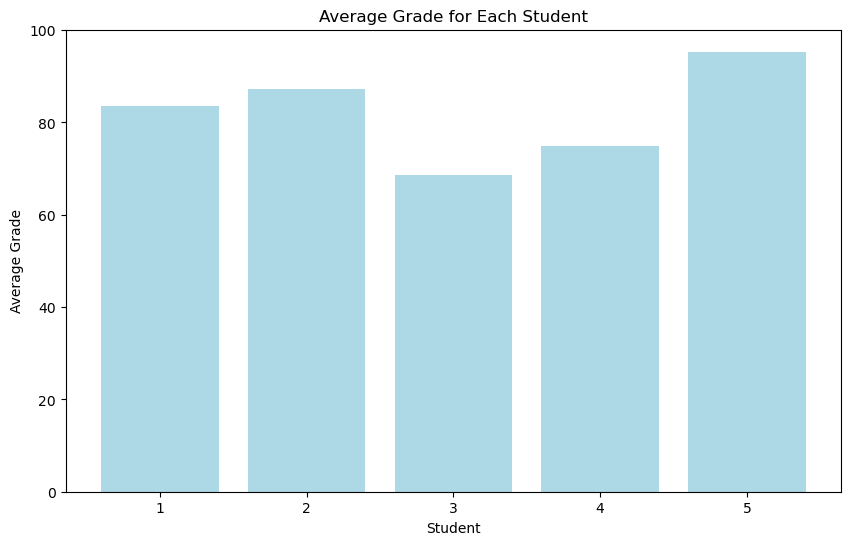

In [155]:
# Plot the average grades for each student
import matplotlib.pyplot as plt

avg_student_grades = df.groupby('student_id')['grade'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(avg_student_grades['student_id'], avg_student_grades['grade'], color='lightblue')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Student')
plt.show()

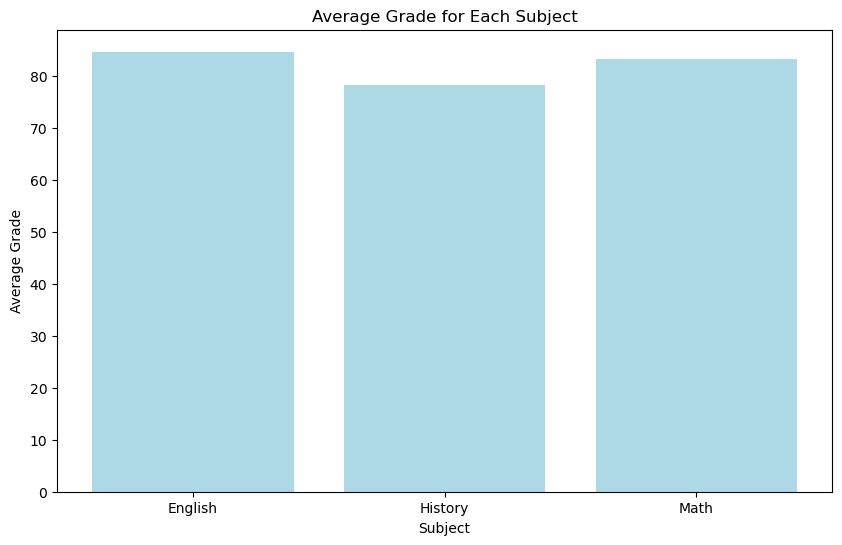

In [157]:
# Plot the average grades for each subject
import matplotlib.pyplot as plt

avg_subject_grades = df.groupby('subject')['grade'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(avg_subject_grades['subject'], avg_subject_grades['grade'], color='lightblue')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.show()

In [195]:
# bonus stuff 1
import matplotlib.pyplot as plt

# Find the average grade for each student
cursor.execute('''
    SELECT s.first_name, s.last_name, g.subject, g.grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    WHERE g.grade = (
        SELECT MAX(grade)
        FROM grades
        WHERE subject = g.subject
    )
''')

data6 = cursor.fetchall()

# Create a DataFrame with appropriate column names
df = pd.DataFrame(data6, columns=['first_name', 'last_name', 'subject', 'grade'])

df

,first_name,last_name,subject,grade
0,Eve,Davis,English,93
1,Eve,Davis,Math,95
2,Eve,Davis,History,98


In [181]:
# bonus stuff 2
